### Data Cleaning - bonus challenge

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("iris-data.csv")

In [6]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking types

In [7]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

### Checking nan values

In [8]:
df.isna().sum()/len(df) * 100

sepal_length_cm    0.000000
sepal_width_cm     0.000000
petal_length_cm    0.000000
petal_width_cm     3.333333
class              0.000000
dtype: float64

In [9]:
df.shape

(150, 5)

In [10]:
df[df["petal_width_cm"].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


### Changing the class names

In [11]:
df["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [12]:
changing_names = {"versicolor":"Iris-versicolor","Iris-setossa":"Iris-setosa"}

df = df.replace(changing_names)

In [13]:
df["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

### Estimating Nan values

#### Here we have 3 options: we could drop the data, we can replace with the mean or with the median or do the linear reg
#### Alberto choose linear reg

In [14]:
df_modified = df.dropna()

In [15]:
df_modified.count()

sepal_length_cm    145
sepal_width_cm     145
petal_length_cm    145
petal_width_cm     145
class              145
dtype: int64

In [16]:
df_modified[df_modified["class"] == "Iris-setosa"][["petal_length_cm","petal_width_cm"]]

,petal_length_cm,petal_width_cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
12,1.4,0.1
13,1.1,0.1
14,1.2,0.2


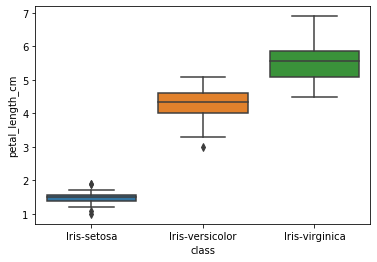

In [17]:
sns.boxplot(data=df ,x="class",y="petal_length_cm")

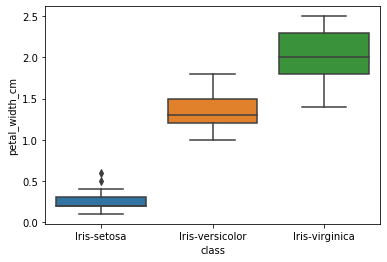

In [18]:
sns.boxplot(data=df ,x="class",y="petal_width_cm")

#### Here we see that there are significant differences between classes, we could substitute the five Nan values with 0.25

In [19]:
df = df.fillna(df['petal_width_cm'][df['class']=='Iris-setosa'].median())
#df.fillna(df_modified["petal_width_cm"].mean())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765399
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


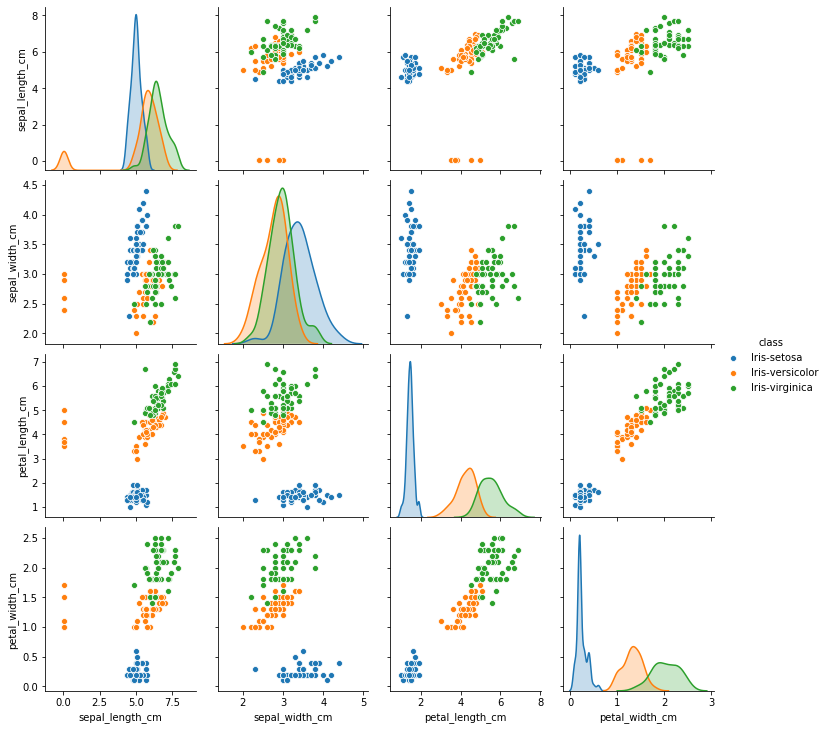

In [22]:
sns.pairplot(df, hue="class", height=2.5)

In [23]:
df_cleaned = df.drop(df[df['sepal_length_cm']<=0.1].index)

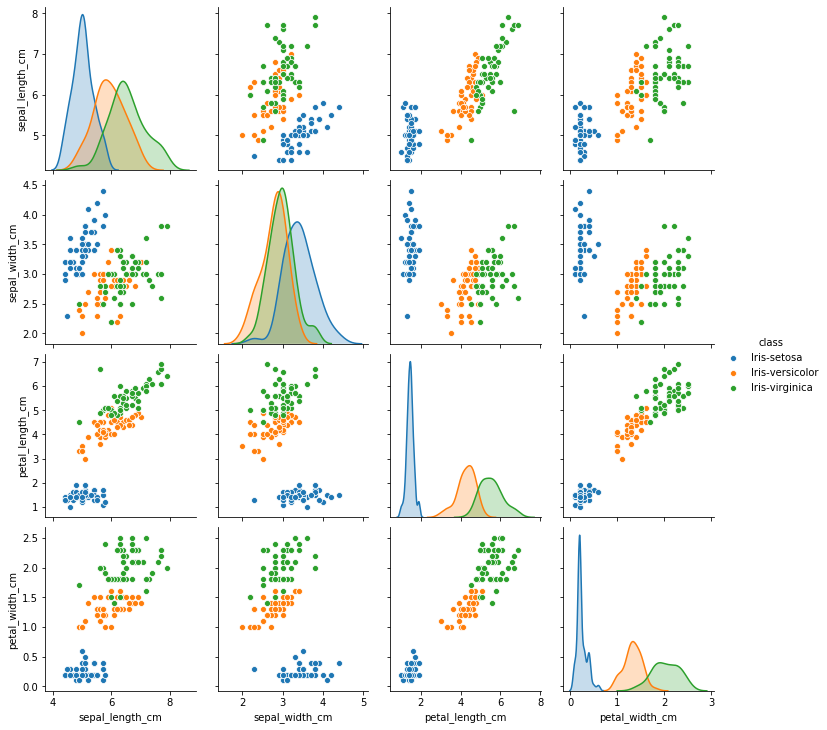

In [24]:
sns.pairplot(df_cleaned, hue="class", height=2.5)